In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

# 필요한 패키지와 라이브러리를 가져옴
plt.rcParams["font.family"] = 'AppleGothic'
%matplotlib inline

# 7. Random Forest

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

### 1. moon data

In [3]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [4]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

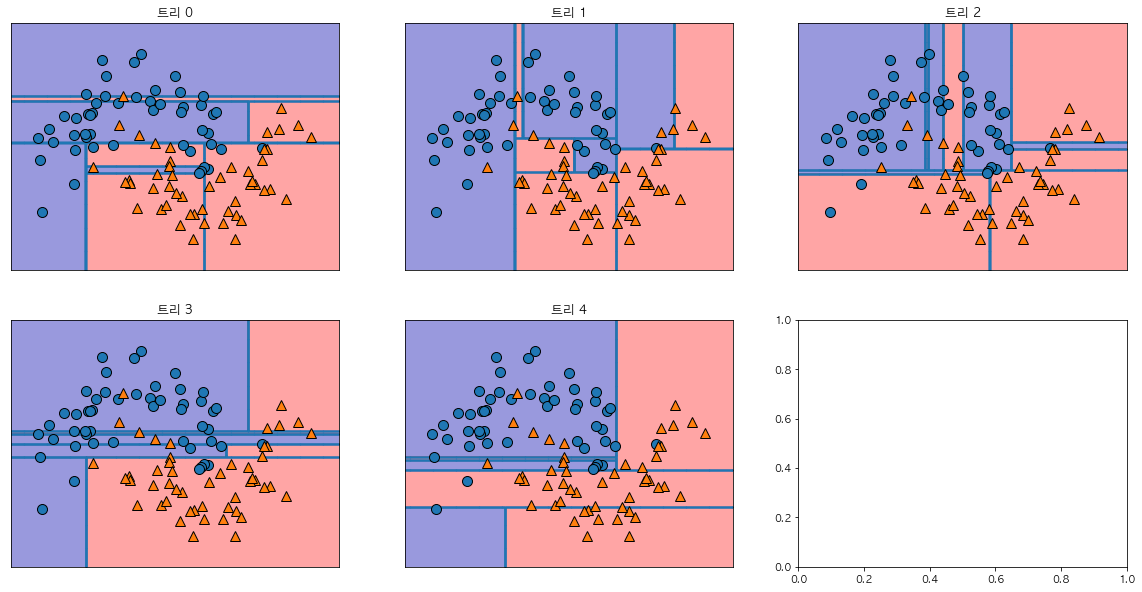

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

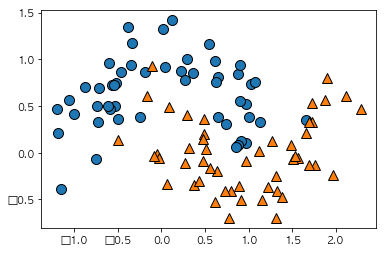

In [6]:
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

### 2. Cancer

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [9]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

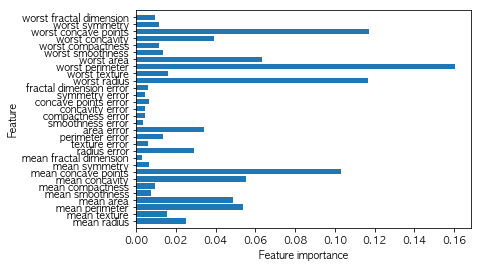

In [10]:
plot_feature_importances_cancer(forest)

### Random Forest 중요 파라미터

1) n_estimators: 트리 개수
    - 가용한 시간과 메모리만큼 많이 만든다.
    
2) max_features: 각 트리의 feature 개수
    - 분류: sqrt(n_features), 회귀: n_features

3) max_depth: 사전 가지치기

4) n_jobs: 코어 개수

# 8. Gradient Boosting

### 중요 파라미터

1) learning_rate: 이전 트리의 오차를 얼마나 강하게 보정할 것인가
    - 학습률이 크면 트리는 보정을 강하게 한다. (복잡한 모델을 만든다)
    
2) n_estimators: 트리 개수
    - 트리 개수가 많아지면 복잡도가 커진다.

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


- 과대 적합 에상

In [12]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [13]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


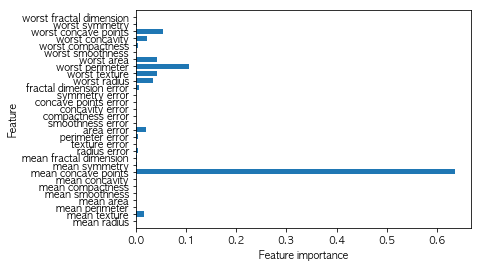

In [14]:
plot_feature_importances_cancer(gbrt)

- gradient boosting의 중요 매개변수는 n_estimators와 learning_rate이다. 
    - learning_rate를 낮추면 비슷한 복잡도 트리를 만들기 위해 더 많은 트리를 추가해야 한다.
    - random forest와 달리 n_estimators를 크게 하면 과대적합될 가능성이 높아진다.
    - max depth를 5보다 적게 한다.

# 9. Kernel SVM

Text(0,0.5,'특성 1')

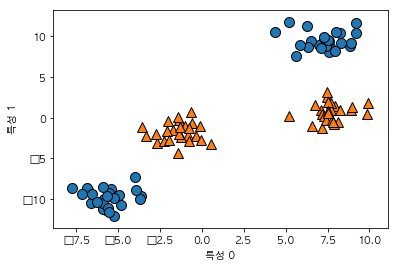

In [15]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

- 선형 분류 모델은 직선으로만 데이터 포인트를 나눌 수 있어서 위와 같은 데이터에는 잘 맞지 않는다.

/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0,0.5,'특성 1')

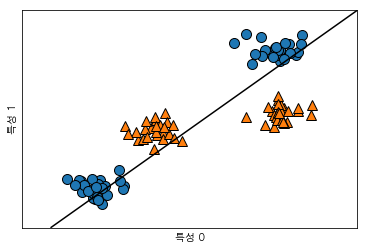

In [16]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

- 특성 추가

In [17]:
X_new = np.hstack([X, X[:, 1:] ** 2])

In [18]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

Text(0.5,0,'특성 1 ** 2')

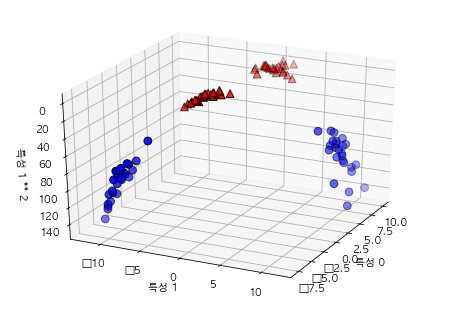

In [19]:
figure = plt.figure()

# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

# y == 0 포인트를 먼저 그리고 y == 1 포인트를 그린다.
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1 ** 2")

In [20]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5,0,'특성 1 ** 2')

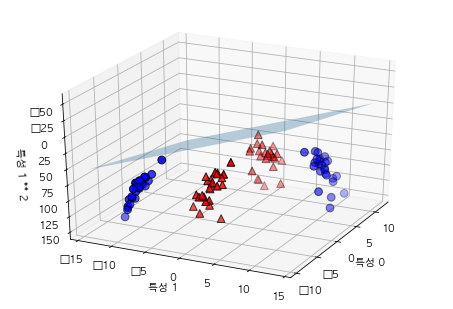

In [21]:
# 선형 결정 경계 그리기
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1 ** 2")

- 원래 특성으로 투영하면 더 이상 선형 SVM 모델은 더 이상 선형이 아니다.

Text(0,0.5,'특성 1')

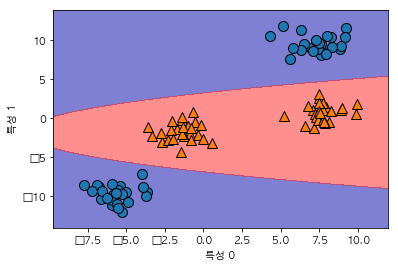

In [22]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### 커널 기법

Text(0,0.5,'특성 1')

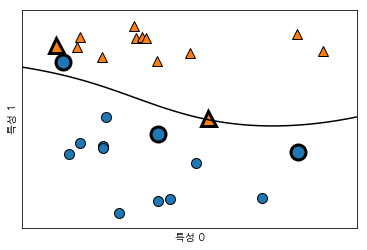

In [23]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### SVM 매개변수 튜닝

- gamma는 가우시안 커널 폭의 역수에 해당한다.
    - gamma 매개변수가 하나의 훈련 샘플의 영향의 범위를 결정한다. 작은 값은 넓은 뜻을 뜻하며 큰 값은 미치는 범위가 제한적이다.
    - 가우시안 커널 반경이 클수록 훈련 샘플의 영향 범위도 커진다.(gamma가 작을수록 훈련 샘플의 영향 범위가 커진다)
    
- C는 선형 모델에서 사용한 것과 비슷한 규제 매개번수이다. 이 배개변수는 각 포인트의 중요도를 제한한다.

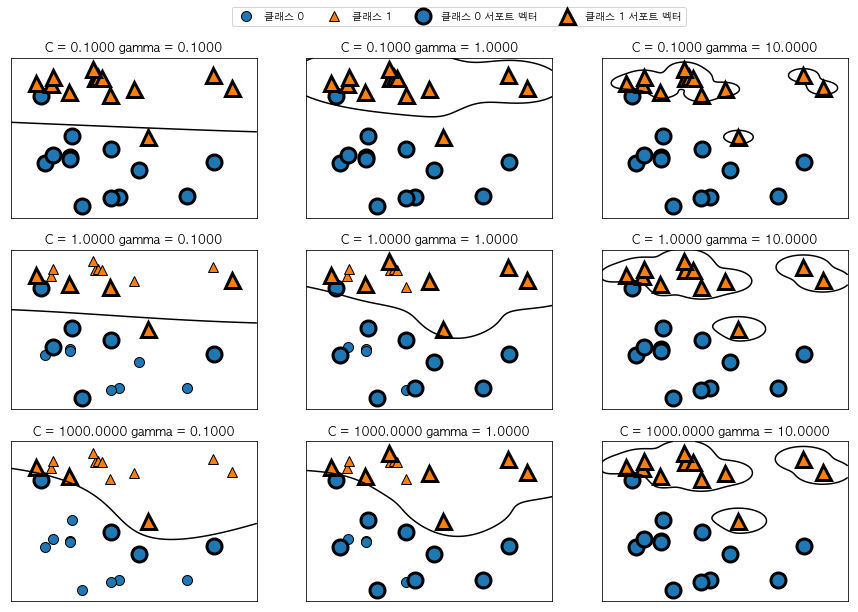

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"], ncol=4, loc=(.9, 1.2))

- 작은 gamma값은 가우시안 커널의 반경을 크게 하여 많은 포인트가 가까이 있는 것으로 고려된다.
- 작은 gamma값은 결정 경계를 천천히 바뀌게 하므로 모델의 복잡도를 낮춘다.
- 큰 gamma 값은 더 복잡한 모델을 만든다.

즉, C와 gamma 값이 클수록 더 복잡한 모델을 만든다.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.629


/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


- SVM은 매개변수 설정과 데이터 스케일에 매우 민감하다.

Text(0,0.5,'특성 크기')

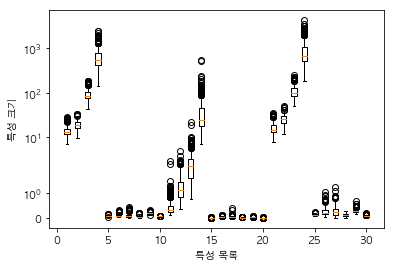

In [26]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

In [27]:
# 특성별 최소값
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

# Scaling
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성 별 최소값: {}".format(X_train_scaled.min(axis=0)))
print("특성 별 최대값: {}".format(X_train_scaled.max(axis=0)))

특성 별 최소값: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성 별 최대값: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [28]:
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.951


/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [29]:
svc = SVC(1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


- SVM은 저차원과 고차원 데이터에 모두 잘 작동한다.
- 샘플이 많을 때는 메모리 관점에서 도전적인 과제이다.
- SVM은 전처리와 매개변수 설정에 많은 신경을 써야 한다.
- SVM은 모델을 분석하기도 어렵다.
- 하지만 모든 특성이 비슷한 단위이고 스케일이 비슷하면 SVM은 시도해볼만하다.

# 10. 신경망 모델

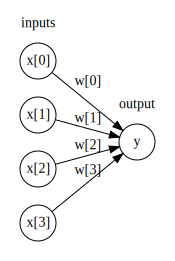

In [32]:
display(mglearn.plots.plot_logistic_regression_graph())

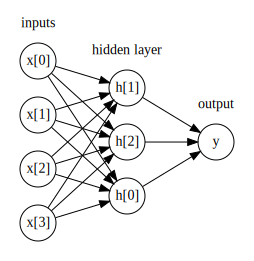

In [33]:
display(mglearn.plots.plot_single_hidden_layer_graph())

- 렐루(relu)와 하이퍼볼릭 탄젠트(tanh)

Text(0,0.5,'relu(x), tanh(x)')

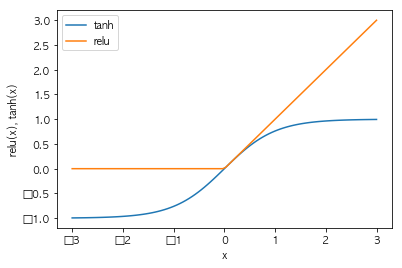

In [35]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel("relu(x), tanh(x)")

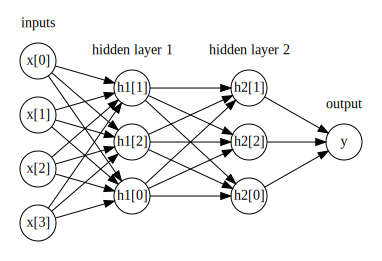

In [36]:
mglearn.plots.plot_two_hidden_layer_graph()

### 신경망 튜닝

Text(0,0.5,'특성 1')

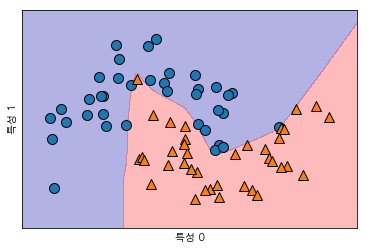

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

- 최적화 알고리즘: lbfgs

Text(0,0.5,'특성 1')

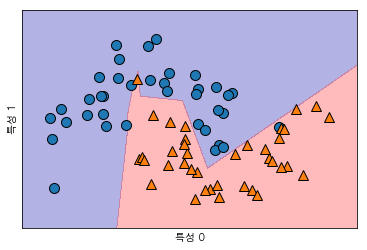

In [39]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10], random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0,0.5,'특성 1')

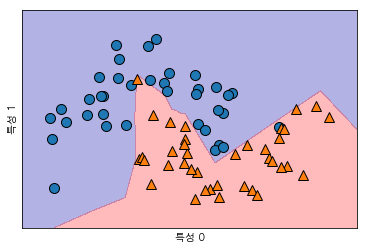

In [40]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10, 10], random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0,0.5,'특성 1')

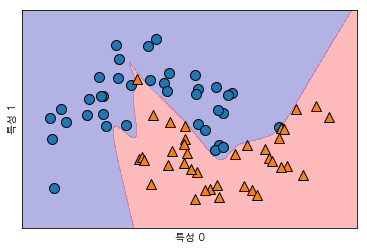

In [41]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10, 10], activation='tanh', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

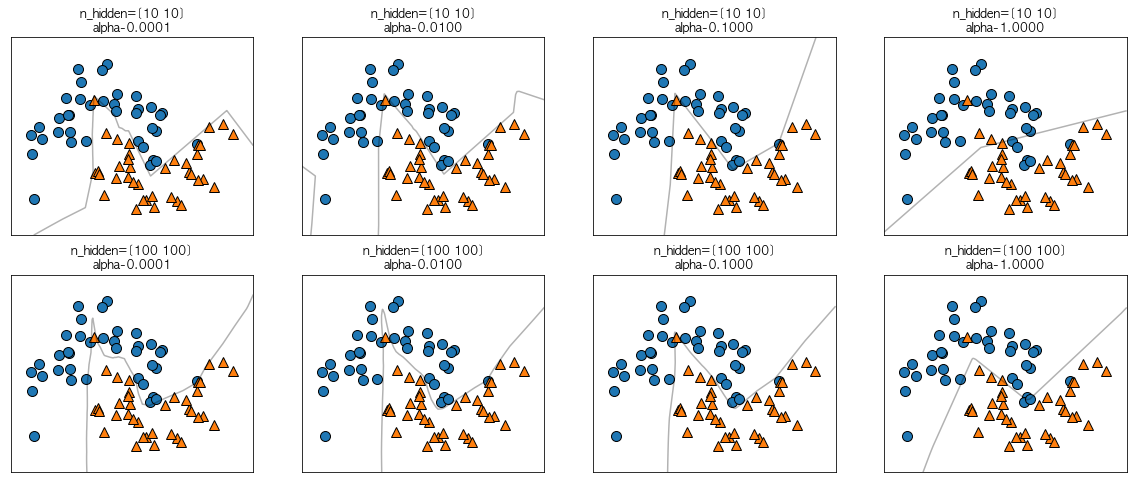

In [44]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], 
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        
        mglearn.plots.plot_2d_separator(mlp, X_train, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{} {}]\nalpha-{:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

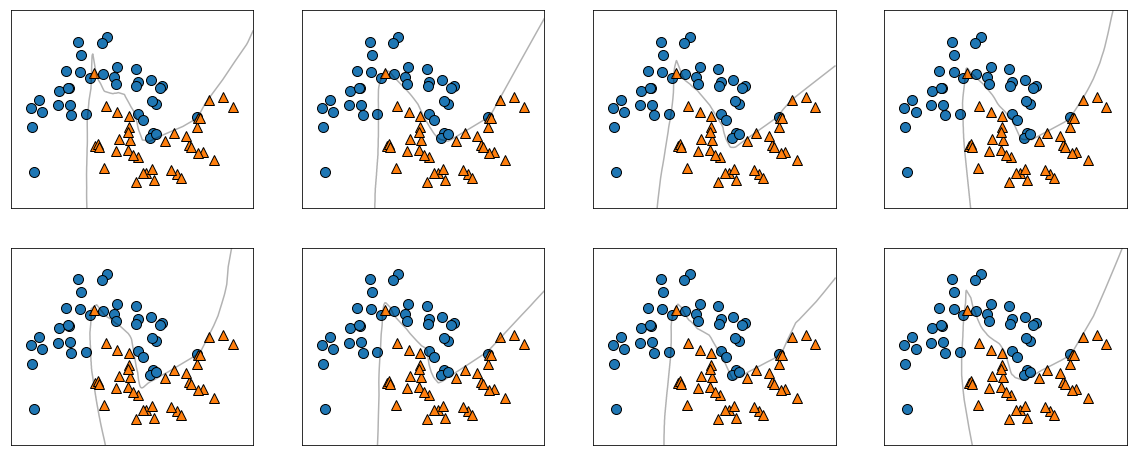

In [48]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)

    mglearn.plots.plot_2d_separator(mlp, X_train, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

### 유방암 데이터 셋

In [56]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [57]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state = 0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


/anaconda3/envs/base-workspace/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [58]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state = 0, max_iter=10000)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [60]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state = 0, max_iter=10000, alpha=1)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


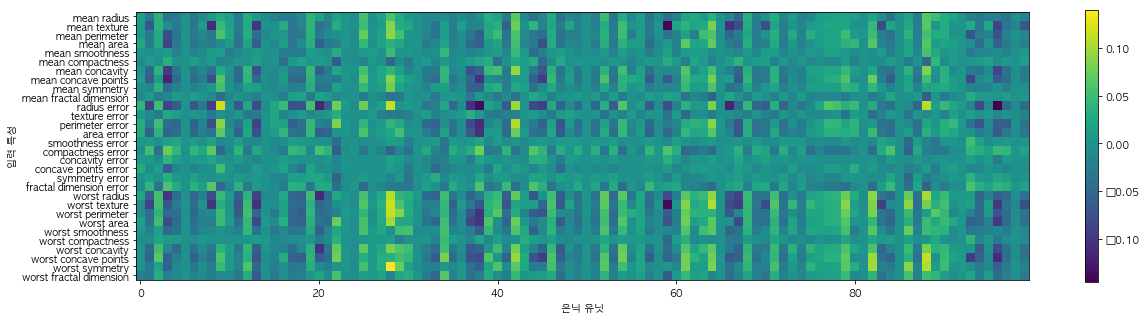

In [61]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()

- 신경망은 학습이 오래 걸린다.
- 신경망 학습은 데이터 전처리에 주의해야 한다.
- SVM과 비슷하게 모든 특성이 같은 의미를 지닌 동질의 데이터에서 잘 작동한다.
- 다른 종류의 특성을 가진 데이터라면 트리기반 모델이 더 잘 작동할 수 있따.
- 신경망 매개변수 튜닝은 예술에 가깝다.